In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns

In [2]:
df = pd.read_pickle('filtered_data.pkl')

In [3]:
df.head(3)

,paragraph,paragraph_num,score_exp,score_org,score_con,total_score,student_group,student_reading,info,type
0,우주#@문장구분# ...,1,"[2, 2, 3]","[2, 2, 3, 2]","[3, 2, 0, 2]",23.587302,2,2,"{'essay_id': 'ESSAY_34071', 'essay_prompt': ' ...",1
1,어느 고요한 상태의 자아가 번득 나타났다. #@문장구분# 이 상태는 무(無)의 상...,2,"[3, 3, 3]","[3, 3, 3, 3]","[2, 3, 0, 3]",28.000000,2,1,"{'essay_id': 'ESSAY_35733', 'essay_prompt': ' ...",1
2,우주는 말로할수 없을 만큼 넒고 큰 존재이다. #@문장구분# 그리고 호기심을 자극...,3,"[3, 3, 3]","[3, 3, 3, 3]","[2, 2, 0, 3]",27.500000,2,1,"{'essay_id': 'ESSAY_35734', 'essay_prompt': ' ...",1


In [76]:
df.columns

Index(['paragraph', 'paragraph_num', 'score_exp', 'score_org', 'score_con',
       'total_score', 'student_group', 'student_reading', 'info', 'type'],
      dtype='object')

In [77]:
score_exp = np.array(list(df['score_exp']))
df['score_exp_1'] = score_exp[:,0]
df['score_exp_2'] = score_exp[:,1]
df['score_exp_3'] = score_exp[:,2]
score_org = np.array(list(df['score_org']))
df['score_org_1'] = score_org[:,0]
df['score_org_2'] = score_org[:,1]
df['score_org_3'] = score_org[:,2]
df['score_org_4'] = score_org[:,3]
score_con = np.array(list(df['score_con']))
df['score_con_1'] = score_con[:,0]
df['score_con_2'] = score_con[:,1]
df['score_con_3'] = score_con[:,2]
df['score_con_4'] = score_con[:,3]

## 특성 살펴보기
데이터에 포함되어 있는 특성이 '표현(exp)','구조(org)','내용(cont)'(이하 점수)와 어떤 상관관계가 있는지 분석한다.
### 분석 내용
1. 텍스트의 길이 및 단락의 갯수와 점수의 상관관계
2. 학생 그룹 차이에 따른 점수의 분포관계
3. 독서와 점수의 상관관계
4. 에세이 타입과 점수의 상관관계

### 0. Text Analysis

In [78]:
all_text = df['paragraph']

In [79]:
def text_preprocessing(text):
    #마침표 제거
    text = re.sub(r"[.]",'',text)
    #문장 갯수 파악
    text_count = text.count('#@문장구분')
    #문장 구분 표시 제거('#@문장구분#' -> '.')
    text = '.'.join([t.strip() for t in text.split(sep = '#@문장구분#')])
    #줄바꿈 제거
    text = re.sub('\n','',text)
    #특수문자 제거
    text = re.sub(r"[^.\uAC00-\uD7A30-9a-zA-Z\s]",'',text)
    #띄어쓰기 조절
    text = ' '.join([i.strip() for i in text.split()])
    return text,text_count+1

In [80]:
#전처리 전후 비교
test_txt = all_text[0]
print('####전처리 전####')
print(test_txt)
print('####전처리 후####')
print(text_preprocessing(test_txt))

####전처리 전####
우주#@문장구분#                                                                       
우주는 모든 물질과 복사를 포함하는 공간과 시간의 전체이다.#@문장구분#우주라는 말은 시공을 뜻할때에는 이 세상에 존재하는 모든물질 공간 시간을 포괄한다.#@문장구분#팽창우주의 발견 이전:중세 유럽까지의 우주관은 그에 앞선 그리스에서 집대성된 우주였다.#@문장구분#그것은 태양과 행성의 규칙적인 운행을 이해하기위한 하늘의 모형으로 그려져 지구 중심으로하여 천구와 주천원 으로 이루어지는 유한의 우주이며 하늘은 땅과 절대적으로 구분되었다.#@문장구분#16세기 중엽에 N.코페르니쿠스의 태양중심모형은 17세기 18세기에 걸쳐 갈릴레이 뉴튼에 의해 하늘과 땅은 구분을 할수있게 되었다.#@문장구분#이리하여 태양을 중심으로 행성이 회전하는 태양계가 사람들에게 인식이 되었다.#@문장구분#18세기 말에는 우리가 속해있는 은하말고도 다른은하가 있다는것을 알게되었다.#@문장구분#20세기에서는 우주에 산재하는 은하까지의 거리를 쟀다.#@문장구분#현대의 우주상은 팽창 우주론과 대폭발설이다.#@문장구분#이 우주론에의하면 백 수십억년전에 폭발을해서 지금까지 계속 이어지고 있다는 것이다.#@문장구분#그폭발로 계속 팽창을 하고있다.#@문장구분#울는 이팽창의 한계를 찾지 못하였다.#@문장구분#우리는 팽창하는 계 속에 살고있고 팽창을 인식하고 있으므로 팽창우주를 하나의 유한한 크기를 가진 천체처럼 생각을 하면 안된다.#@문장구분#우주의 크기는 정확하진 않지만 1000억개 이상의 은하를가지고 100광년의 범위를 가지고있고,과거 100억년 간의 걸친 시간 범위 내에서 팽창을 계속 하고있는 우주이다.#@문장구분#또 이 공간의 영역에서는 우주는 대략 한결같다.#@문장구분# 우주의 시초는 빅뱅이론이 가장 큰 영향을준다.#@문장구분#내가보기에 우주는 끝을 정확히 알수없는 무한한 존재인것같다.#@문장구분#
####전처리 후####
('우주.

In [81]:
sentences = [] #문장
sent_num = [] #문장 갯수
for at in all_text:
    pre_txt = text_preprocessing(at)
    sentences.append(pre_txt[0])
    sent_num.append(pre_txt[1])
df['sentence_num'] = sent_num
df['paragraph'] = sentences

In [82]:
print(f'최소 문장 수 :{min(sent_num)}')
print(f'최대 문장 수 :{max(sent_num)}')

최소 문장 수 :3
최대 문장 수 :97


<Axes: ylabel='Count'>

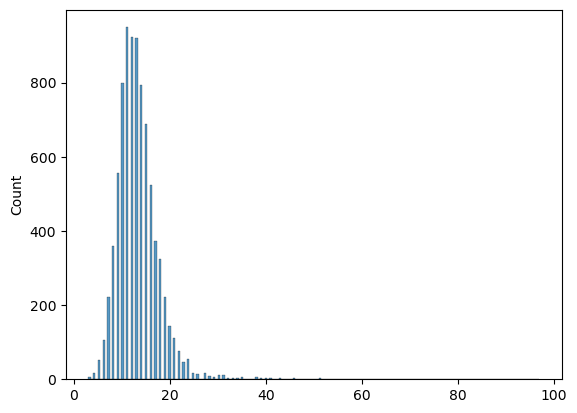

In [83]:
#문장 갯수
sns.histplot(sent_num)

문장 갯수의 분포가 대략적으로 정규 분포를 따르는 것 처럼 보인다.  
그렇다면 정말 문장의 분포는 정규 분포를 따를까?  
표본의 수가 약 8400개 이므로 Kolmogorov-Smirnov Test를 해보자

In [84]:
import scipy.stats as stats

In [85]:
sent_num = np.array(sent_num)
sent_stats,p_val = stats.kstest(sent_num,'norm',args = (sent_num.mean(),sent_num.var()**0.5))
print(f'Statics : {sent_stats}, P-value :{p_val}')
#p-val < 0.5 이므로 정규성은 없다

Statics : 0.12640124986396095, P-value :1.613266779828193e-117


Middle School Stats:
 count    5320.000000
mean       12.106015
std         3.424095
min         3.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        51.000000
Name: sentence_num, dtype: float64

High School Stats:
 count    3085.000000
mean       15.490438
std         6.014977
min         4.000000
25%        12.000000
50%        15.000000
75%        17.000000
max        97.000000
Name: sentence_num, dtype: float64


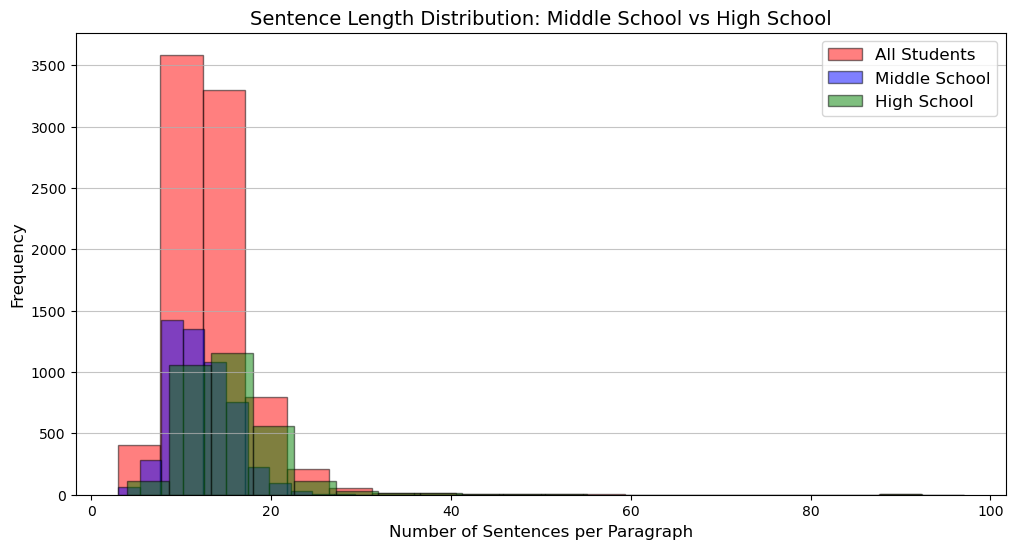

In [109]:
#학년별 문장 수 분포
import matplotlib.pyplot as plt

# 중학생과 고등학생 데이터 필터링
middle_school = df[df['student_group'] == 1]
high_school = df[df['student_group'] == 2]

# 문단의 문장 길이 계산 (문장 구분자로 나눔)
all_students_lengths = df['sentence_num']
middle_school_lengths = middle_school['sentence_num']
high_school_lengths = high_school['sentence_num']

#중학생과 고등학생 텍스트 데이터 통계
middle_stats = middle_school_lengths.describe()
high_stats = high_school_lengths.describe()
print("Middle School Stats:\n", middle_stats)
print("\nHigh School Stats:\n", high_stats)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.hist(all_students_lengths,bins =20, alpha = 0.5, label="All Students",color='red',edgecolor='black')
plt.hist(middle_school_lengths, bins=20, alpha=0.5, label="Middle School", color='blue', edgecolor='black')
plt.hist(high_school_lengths, bins=20, alpha=0.5, label="High School", color='green', edgecolor='black')

# 그래프 제목 및 레이블 설정
plt.title("The number of Sentence Distribution: Middle School vs High School", fontsize=14)
plt.xlabel("Number of Sentences per Paragraph", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 범례 및 그리드 추가
plt.legend(fontsize=12)
plt.grid(axis='y', alpha=0.75)

# 그래프 표시
plt.show()

In [87]:
print(pd.pivot_table(df,
               index = 'score_exp_1',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_exp_2',
               columns =['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_exp_3',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))

type                   1                     2           
student_group          1          2          1          2
score_exp_1                                              
1              15.400000   7.200000  22.000000  16.000000
2              11.970817  14.685654  12.401451  15.807980
3              11.752903  15.041116  12.315651  15.912186
type                   1                     2           
student_group          1          2          1          2
score_exp_2                                              
1              13.277778  26.000000  12.772727        NaN
2              12.206696  14.144000  12.359797  15.042781
3              11.711099  15.047305  12.336638  16.068343
type                   1                     2           
student_group          1          2          1          2
score_exp_3                                              
1              11.847826  13.473684  12.212121  13.000000
2              11.963216  14.440454  12.442167  15.552017
3             

In [88]:
print(pd.pivot_table(df,
               index = 'score_org_1',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_org_2',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_org_3',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_org_4',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))

type                   1                     2           
student_group          1          2          1          2
score_org_1                                              
1              10.173913  13.909091  10.400000  14.000000
2              11.966292  14.444251  12.600470  15.671545
3              11.798931  15.297391  12.244373  15.967841
type                   1                     2           
student_group          1          2          1          2
score_org_2                                              
0                    NaN        NaN  12.345168        NaN
1              12.588235  16.222222        NaN  12.500000
2              11.905840  14.578431        NaN  15.821721
3              11.821016  15.001346        NaN  15.889895
type                   1                     2           
student_group          1          2          1          2
score_org_3                                              
1              11.647059  15.000000  10.000000  18.250000
2             

In [89]:
print(pd.pivot_table(df,
               index = 'score_con_1',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_con_2',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_con_3',
               columns =['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))
print(pd.pivot_table(df,
               index = 'score_con_4',
               columns = ['type','student_group'],
               values = 'sentence_num',
               aggfunc = 'mean'))

type                   1                     2           
student_group          1          2          1          2
score_con_1                                              
0              11.500000  32.000000        NaN        NaN
1              12.090909  14.263158   8.000000  13.000000
2              11.933333  14.453012  11.967480  17.441441
3              11.827551  15.110482  12.420986  15.543396
type                   1                    2           
student_group          1          2         1          2
score_con_2                                             
1              12.104167  14.285714  10.28125  14.250000
2              11.763526  14.505806  12.33587  15.510441
3              12.005587  15.767857  12.44186  16.663961
type                   1                     2           
student_group          1          2          1          2
score_con_3                                              
0              11.853555  14.862069        NaN        NaN
1                   

In [90]:
pd.pivot_table(df,
               index = 'type',
               columns = ['student_group'],
               values = 'paragraph_num',
               aggfunc = 'mean')

student_group,1,2
type,,
1,1.076121,1.043966
2,1.080161,1.111688


In [91]:
pd.pivot_table(df,
               index = 'type',
               columns = 'student_group',
               values = 'sentence_num',
               aggfunc = ['mean'])

mean           
student_group          1          2
type                               
1              11.853555  14.862069
2              12.345168  15.869091

## 학년별 글쓰기 유형별 최종 점수

In [107]:
s_pivot = pd.pivot_table(df,
               index = 'type',
               columns = ['student_group'],
               values = 'total_score',
               aggfunc = 'mean')
s_pivot.index = ['수필형','논술형']
s_pivot.columns = ['중학생','고등학생']
s_pivot

,중학생,고등학생
수필형,26.560042,26.066112
논술형,26.909883,27.094961


## 독서량에 따른 점수 분포

In [110]:
s_pivot = pd.pivot_table(df,
               index = 'student_group',
               columns = ['type'],
               values = 'total_score',
               aggfunc = 'mean')
s_pivot

type,1,2
student_group,,
1,26.560042,26.909883
2,26.066112,27.094961


In [94]:
s_pivot = pd.pivot_table(df,
               index = 'student_reading',
               columns = ['type','student_group'],
               values = 'total_score',
               aggfunc = 'mean')
s_pivot

type                     1                     2           
student_group            1          2          1          2
student_reading                                            
1                26.462461  26.262620  26.656402  26.953664
2                26.652546  25.945737  26.858929  27.199257
3                26.538667  26.190262  27.354573  27.250365

In [95]:
s_pivot = pd.pivot_table(df,
               index = 'student_reading',
               columns = ['type','student_group'],
               values = ['score_exp_1','score_exp_2','score_exp_3'],
               aggfunc = 'mean')
s_pivot

score_exp_1                               score_exp_2  \
type                      1                   2                     1   
student_group             1         2         1         2           1   
student_reading                                                         
1                  2.594350  2.591549  2.686772  2.548463    2.725424   
2                  2.591837  2.566282  2.677679  2.593418    2.717069   
3                  2.601600  2.657658  2.742129  2.627737    2.720000   

                                              score_exp_3                      \
type                              2                     1                   2   
student_group           2         1         2           1         2         1   
student_reading                                                                 
1                2.805634  2.735450  2.788416    2.501695  2.532394  2.682540   
2                2.766571  2.751786  2.811040    2.455473  2.475504  2.719643   
3                2.810811  2.838081  2.875912    2.480000  2.666667  2.797601   

                           
type                       
student_group           2  
student_reading            
1                2.705674  
2                2.778132  
3                2.817518

In [96]:
s_pivot = pd.pivot_table(df,
               index = 'student_reading',
               columns = ['type','student_group'],
               values = ['score_org_1','score_org_2','score_org_3','score_org_4'],
               aggfunc = 'mean')
s_pivot

score_org_1                               score_org_2  \
type                      1                   2                     1   
student_group             1         2         1         2           1   
student_reading                                                         
1                  2.557062  2.543662  2.650794  2.647754    2.654237   
2                  2.571429  2.439481  2.684821  2.692144    2.694805   
3                  2.584000  2.594595  2.703148  2.744526    2.619200   

                                         score_org_3                      \
type                         2                     1                   2   
student_group           2    1         2           1         2         1   
student_reading                                                            
1                2.676056  0.0  2.700946    2.645198  2.645070  2.715344   
2                2.597983  0.0  2.773885    2.653061  2.599424  2.725000   
3                2.711712  0.0  2.810219    2.592000  2.657658  2.797601   

                          score_org_4                                
type                                1                   2            
student_group           2           1         2         1         2  
student_reading                                                      
1                2.689125    2.768362  2.963380  2.801058  2.912530  
2                2.753715    2.856215  2.976945  2.807143  2.976645  
3                2.788321    2.838400  2.981982  2.883058  2.963504

In [97]:
s_pivot = pd.pivot_table(df,
               index = 'student_reading',
               columns = ['type','student_group'],
               values = ['score_con_1','score_con_2','score_con_3','score_con_4'],
               aggfunc = 'mean')
s_pivot

score_con_1                               score_con_2  \
type                      1                   2                     1   
student_group             1         2         1         2           1   
student_reading                                                         
1                  2.720904  2.571831  2.833862  2.829787    2.293785   
2                  2.770872  2.589337  2.862500  2.831210    2.363636   
3                  2.761600  2.486486  2.886057  2.751825    2.312000   

                                              score_con_3                 \
type                              2                     1              2   
student_group           2         1         2           1    2         1   
student_reading                                                            
1                2.292958  2.291005  2.338061         0.0  0.0  2.691005   
2                2.229107  2.292857  2.288747         0.0  0.0  2.706250   
3                2.216216  2.337331  2.306569         0.0  0.0  2.731634   

                          score_con_4                                
type                                1                   2            
student_group           2           1         2         1         2  
student_reading                                                      
1                2.848700    2.701695  2.661972  2.717460  2.819149  
2                2.788747    2.736549  2.648415  2.741964  2.821656  
3                2.700730    2.702400  2.549550  2.781109  2.744526